In [56]:
# some links I used for getting information:
# https://chrisalbon.com/python/data_wrangling/pandas_search_column_for_value/
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets.samples_generator import make_blobs

In [67]:
data = pd.DataFrame(np.random.random((20, 20)))
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.583103,0.986732,0.562700,0.231415,0.010742,0.986689,0.834775,0.873709,0.848043,0.435550,0.501050,0.162692,0.467634,0.693780,0.643895,0.755854,0.983217,0.942946,0.801416,0.838072
1,0.438814,0.939829,0.615255,0.801860,0.342999,0.722211,0.758802,0.450237,0.635692,0.335046,0.965193,0.125738,0.999394,0.857769,0.665031,0.799952,0.182866,0.058830,0.063510,0.480916
2,0.298823,0.676413,0.005630,0.283543,0.872780,0.974780,0.988241,0.565902,0.487672,0.789234,0.000133,0.483853,0.149985,0.244881,0.689270,0.467050,0.130685,0.405230,0.650928,0.619777
3,0.231317,0.608640,0.664188,0.708508,0.016457,0.634985,0.519707,0.699450,0.514214,0.111633,0.380625,0.693033,0.692226,0.113806,0.111701,0.608292,0.212106,0.240851,0.110474,0.041430
4,0.786257,0.845598,0.030112,0.345269,0.350374,0.675088,0.046285,0.302282,0.777060,0.774711,0.499593,0.353366,0.471115,0.795174,0.092208,0.007894,0.035607,0.142660,0.814426,0.495082
5,0.565288,0.482458,0.034352,0.087765,0.782471,0.290654,0.773191,0.096255,0.094016,0.218114,0.471701,0.712781,0.393383,0.166684,0.778481,0.837336,0.866266,0.046410,0.531311,0.513914
6,0.617096,0.129712,0.421759,0.031672,0.377755,0.180167,0.609566,0.059971,0.573926,0.560380,0.168922,0.236787,0.198894,0.437540,0.470781,0.684692,0.145081,0.029007,0.901873,0.749154
7,0.023455,0.436069,0.008504,0.490130,0.849063,0.365206,0.952582,0.425251,0.694269,0.163673,0.929715,0.857154,0.100235,0.828995,0.359808,0.978460,0.016229,0.383278,0.864315,0.632190
8,0.150318,0.241909,0.473519,0.804726,0.805781,0.091633,0.594900,0.565909,0.861126,0.881880,0.970208,0.116886,0.226709,0.645921,0.151314,0.488274,0.194777,0.340058,0.614136,0.450440
9,0.426581,0.371023,0.475844,0.965463,0.004463,0.292011,0.278206,0.703271,0.272738,0.706623,0.871312,0.000435,0.654519,0.399519,0.225538,0.480476,0.536944,0.093190,0.965180,0.718484


In [57]:
data.shape

(20, 20)

In [82]:
f1=data[0]
print(f1)

0     0.583103
1     0.438814
2     0.298823
3     0.231317
4     0.786257
5     0.565288
6     0.617096
7     0.023455
8     0.150318
9     0.426581
10    0.266179
11    0.345561
12    0.418439
13    0.522548
14    0.243886
15    0.607014
16    0.585554
17    0.772765
18    0.666542
19    0.834134
Name: 0, dtype: float64


In [84]:
f2=data[2]
print(f2)

0     0.562700
1     0.615255
2     0.005630
3     0.664188
4     0.030112
5     0.034352
6     0.421759
7     0.008504
8     0.473519
9     0.475844
10    0.235847
11    0.201953
12    0.407040
13    0.970381
14    0.550060
15    0.840851
16    0.856316
17    0.269521
18    0.283025
19    0.532124
Name: 2, dtype: float64


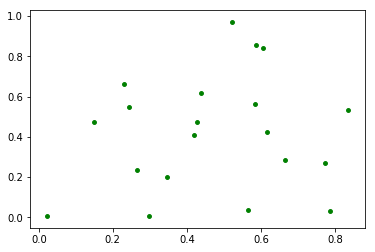

In [150]:
plt.scatter(f1, f2, c='green', s=15)

X = (list(zip(f1, f2)))

In [92]:
print(X)

[(0.5831034468976265, 0.5626997603917772), (0.4388138130372493, 0.6152554416352453), (0.29882275560041516, 0.005629522854875613), (0.23131742811693767, 0.6641876378679861), (0.7862573921322535, 0.030111790930937743), (0.5652875024023242, 0.03435163079957271), (0.6170958721614874, 0.4217586179400704), (0.023454919106252636, 0.008503869890717719), (0.15031818768837601, 0.47351882344535956), (0.4265806707250628, 0.47584411790896775), (0.26617948742577935, 0.23584736205036605), (0.3455613632144058, 0.20195273213877996), (0.4184385081000568, 0.40703954744250137), (0.5225483667628609, 0.9703810292192349), (0.24388572829414856, 0.5500602383218257), (0.6070137175644476, 0.8408507759246397), (0.585553884346227, 0.8563158160438424), (0.7727654389005633, 0.2695207805792077), (0.6665418118869701, 0.2830247095636891), (0.8341344281060112, 0.532123502302768)]


In [112]:
# random state equals to 0 since we won't redefine the centroids, but add more data to the plot
kmeans = MiniBatchKMeans(n_clusters=4, 
                         batch_size=4, 
                         max_iter=10,
                        random_state=0)
print(kmeans)

MiniBatchKMeans(batch_size=4, compute_labels=True, init='k-means++',
        init_size=None, max_iter=10, max_no_improvement=10, n_clusters=4,
        n_init=3, random_state=0, reassignment_ratio=0.01, tol=0.0,
        verbose=0)


In [149]:
kmeans = kmeans.fit(X[0:19]) # Compute the centroids on X by chunking it into mini-batches.

kmeans.cluster_centers_

array([[0.2787789 , 0.11085749],
       [0.73106643, 0.14300239],
       [0.35566364, 0.70737016],
       [0.51930298, 0.48223324]])

In [3]:
k=4
   
Indecies_centroid = np.random.choice(n_samples,size=k) # for initialization we choose some random datapoint in order to avoid that no data points were assigned to random centroid
    
      
C=X[Indecies_centroid]

print(Indices_centroid)

NameError: name 'np' is not defined